In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [12]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        with open(os.path.join(dir, file.name), 'rb') as input_file:
            value = pickle.load(input_file)
        set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)              

{'leap': {'1000': [0.08076596260070801, 0.0798192024230957, 0.08202958106994629, 0.08120465278625488, 0.05850696563720703, 0.05931663513183594, 0.060141563415527344, 0.05875134468078613, 0.058344364166259766, 0.05872225761413574, 0.05864858627319336, 0.06303620338439941, 0.05876660346984863, 0.05892634391784668, 0.05960822105407715, 0.059578657150268555, 0.05916452407836914, 0.05972099304199219, 0.0592195987701416, 0.05871009826660156, 0.0669708251953125, 0.07706093788146973, 0.10293173789978027, 0.0947120189666748, 0.08216524124145508, 0.08161759376525879, 0.08187460899353027, 0.08162569999694824, 0.08092427253723145, 0.06000161170959473, 0.0586545467376709, 0.05988025665283203, 0.0588071346282959, 0.058769941329956055, 0.059153079986572266, 0.05918383598327637, 0.0593867301940918, 0.05893707275390625, 0.05908370018005371, 0.05903005599975586, 0.05916261672973633, 0.058815717697143555, 0.05951285362243652, 0.05867457389831543, 0.05879831314086914, 0.05866265296936035, 0.05873227119445

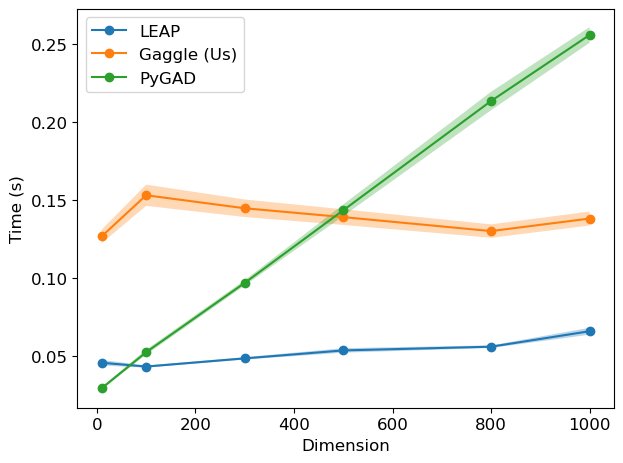

<Figure size 640x480 with 0 Axes>

In [14]:
dimesions = [10, 100, 300, 500, 800, 1000]
plt.rcParams.update({'font.size': 12})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP', 'pygad': 'PyGAD'}
for algorithm in CI_dict:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in dimesions]
    lower = [result[str(x)][1] for x in dimesions]
    upper = [result[str(x)][2] for x in dimesions]
    plt.plot(dimesions, values, label=nice_names[algorithm], marker='o')
    plt.fill_between(dimesions, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Dimension")
plt.ylabel("Time (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/mnist_plot.png', bbox_inches='tight')
plt.show()
plt.clf()